Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Loading the dataset

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Car details v3.csv")
# Display first 5 rows
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Data Description


In [ ]:


# Load your cleaned dataset (you probably already have this)
df = pd.read_csv('Car details v3.csv')  # Or your correct filename

# Generate data description table
description = pd.DataFrame({
    "Feature": df.columns,
    "Data Type": df.dtypes.values,
    "Unique Values": df.nunique().values,
    "Missing Values": df.isnull().sum().values
})

description


,Feature,Data Type,Unique Values,Missing Values
0,name,object,2058,0
1,year,int64,29,0
2,selling_price,int64,677,0
3,km_driven,int64,921,0
4,fuel,object,4,0
5,seller_type,object,3,0
6,transmission,object,2,0
7,owner,object,5,0
8,mileage,object,393,221
9,engine,object,121,221


Data Preprocessing

Checking for Missing/Null values

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


 Checking How Much Data is Missing

Why?

If a column has very few missing values (like <5%), we can fill them with mean/median/mode.

If a column has a lot of missing values, we need to decide whether to drop it or use advanced techniques to fill it.

In [ ]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Only show columns with missing values

# Display missing data percentage
print(missing_percentage)

mileage      2.718996
engine       2.718996
max_power    2.645177
torque       2.731299
seats        2.718996
dtype: float64


Missing Values Heatmap

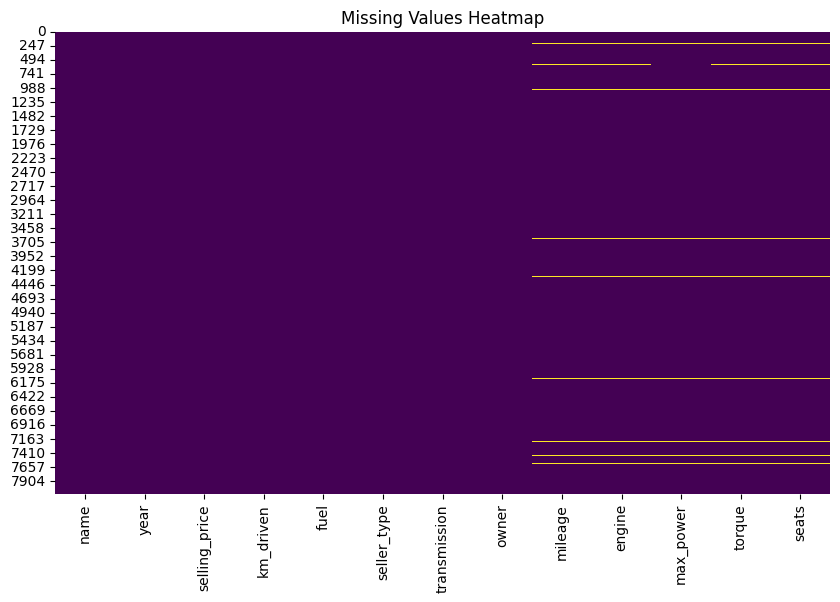

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Boxplots for Identifying Outliers

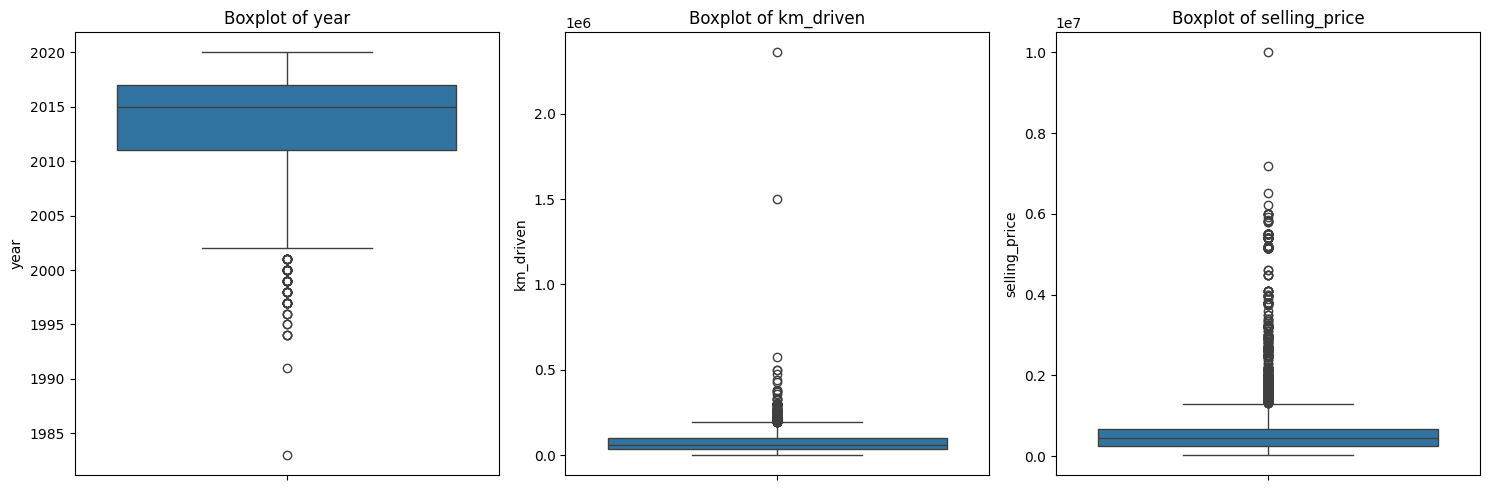

In [ ]:
numerical_cols = ['year', 'km_driven', 'selling_price']  # Replace with your numeric columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Handling Missing Values

 1. Fixing seats Column (Categorical Data)

In [ ]:
# Fill missing values in 'seats' with the most common value (mode)
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


2. Fixing mileage, engine, and max_power (Numerical Data)

2.1 Convert mileage to Numeric Values
why?
This is because the mileage column contains strings like "23.4 kmpl", which means we need to convert it into a numerical format first before calculating the median.

In [ ]:
# Replace both "kmpl" and "km/kg" before converting to float
df['mileage'] = df['mileage'].str.replace(' kmpl| km/kg', '', regex=True).astype(float)


2.2  Fill Missing Values in mileage

In [ ]:
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

3. Convert engine and max_power to Numeric

In [ ]:
# Ensure 'engine' is a string before applying .str.replace()
df['engine'] = df['engine'].astype(str).str.replace(' CC', '', regex=True)
df['engine'] = df['engine'].replace(['', 'nan'], np.nan)  # Handle empty strings and 'nan' strings
df['engine'] = df['engine'].astype(float)  # Convert to float

# Ensure 'max_power' is a string before applying .str.replace()
df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '', regex=True)
df['max_power'] = df['max_power'].replace(['', 'nan'], np.nan)  # Handle empty strings and 'nan' strings
df['max_power'] = df['max_power'].astype(float)  # Convert to float



3.1. Fill missing values

In [ ]:
df['engine'] = df['engine'].fillna(df['engine'].median())
df['max_power'] = df['max_power'].fillna(df['max_power'].median())

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


4. Understanding the torque Column -
Before filling missing values, let's check the format of the torque column:

In [ ]:
df['torque'].head(10)  # Display first 10 values

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,"12.7@ 2,700(kgm@ rpm)"
3,22.4 kgm at 1750-2750rpm
4,"11.5@ 4,500(kgm@ rpm)"
5,113.75nm@ 4000rpm
6,"7.8@ 4,500(kgm@ rpm)"
7,59Nm@ 2500rpm
8,170Nm@ 1800-2400rpm
9,160Nm@ 2000rpm


4.1.  Fixing torque Column

In [ ]:
# import re
# import numpy as np

# def extract_first_float(value):
#     if pd.isna(value) or value.strip() == '':
#         return np.nan  # Return NaN for missing values

#     # Extract the first floating-point number using regex
#     match = re.match(r'^(\d+\.?\d*)', value.strip())
#     if match:
#         return float(match.group(1))  # Convert to float
#     else:
#         return np.nan  # Return NaN if no number is found

# # Apply the function to clean the 'torque' column
# df['torque'] = df['torque'].apply(extract_first_float)

# # Check the cleaned values
# print(df['torque'].head(10))



In [ ]:
# print(df['torque'].isnull().sum(), "missing values out of", len(df))
# print(df['torque'].unique())  # Check extracted values


4.2. Dropping Torque Column

In [ ]:
df.drop(columns=['torque'], inplace=True)

In [ ]:
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


5. Convert Categorical Variables to Numerical Format

5.2. Check Unique Values in Categorical Columns

In [ ]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())


['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


5.3. Convert Using pd.get_dummies()
One-Hot Encoding converts categories into numbers

In [ ]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)


5.4. Check Correlations

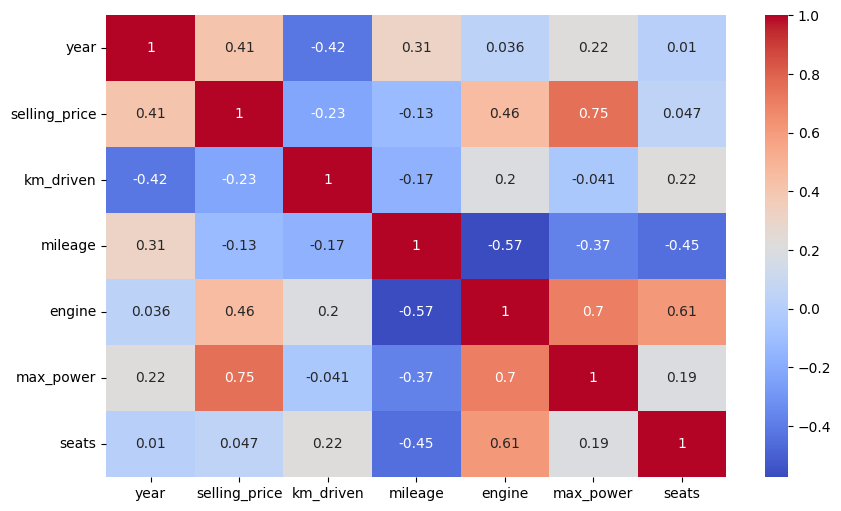

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

5.4.1 check the correlation values numerically:

This will give us a sorted list of which features impact price the most.

In [ ]:
print(numeric_df.corr()['selling_price'].sort_values(ascending=False))


selling_price    1.000000
max_power        0.747935
engine           0.458345
year             0.414092
seats            0.047135
mileage         -0.125040
km_driven       -0.225534
Name: selling_price, dtype: float64


6.  Dropping Irrelevant Features

6.1. Code to drop the seats column

In [ ]:
df.drop(columns=['seats'], inplace=True)
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


7. Handling Missing Values (Final Check)

In [ ]:
print(df.isnull().sum())

name                            0
year                            0
selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64


Heatmap implying absense of null values

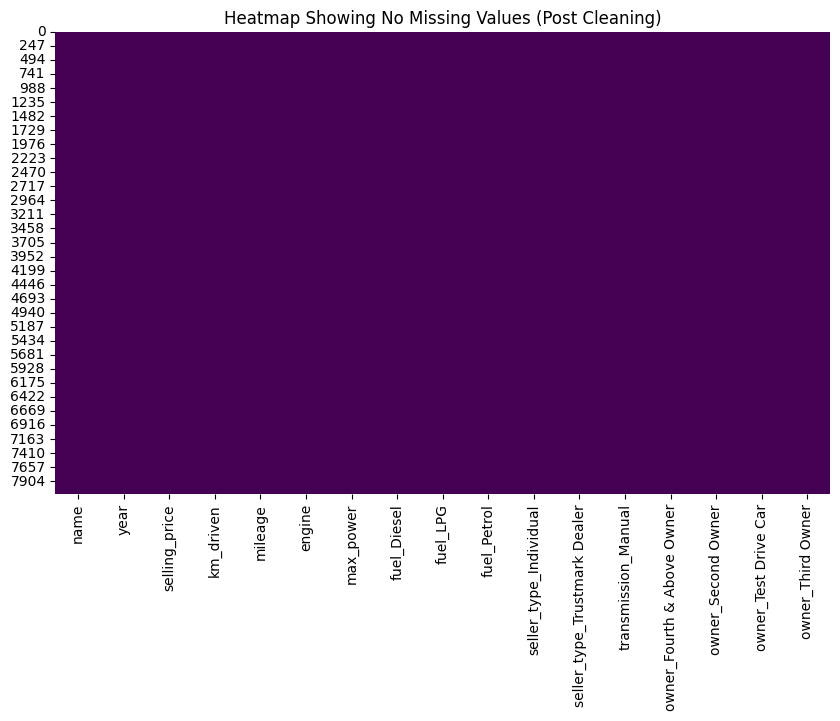

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your cleaned DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap Showing No Missing Values (Post Cleaning)")
plt.show()


 Final Dataset Structure

In [ ]:
# Display shape and datatypes of cleaned dataset
print(df.shape)
print(df.dtypes)


(8128, 17)
name                             object
year                              int64
selling_price                     int64
km_driven                         int64
mileage                         float64
engine                          float64
max_power                       float64
fuel_Diesel                        bool
fuel_LPG                           bool
fuel_Petrol                        bool
seller_type_Individual             bool
seller_type_Trustmark Dealer       bool
transmission_Manual                bool
owner_Fourth & Above Owner         bool
owner_Second Owner                 bool
owner_Test Drive Car               bool
owner_Third Owner                  bool
dtype: object


## 📊 Exploratory Data Analysis (EDA) - Visualization
In this section, we will perform graphical exploration of our dataset to understand feature distributions, relationships, and potential outliers.

1. Distribution Plots (Histogram / KDE)
Show how features like Selling Price, Kilometers Driven, Mileage, Engine size, Power are distributed.

Helps show skewness (whether data is left- or right-skewed).

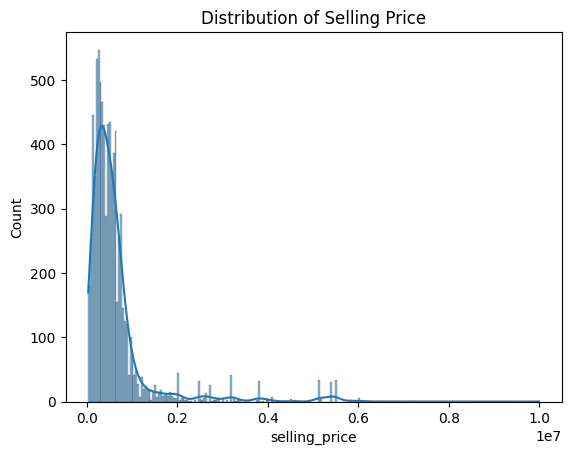

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()


2. Count Plots for Categorical Features
How many cars are Petrol vs Diesel vs LPG?

How many Manual vs Automatic?

How many First Owner, Second Owner, etc.

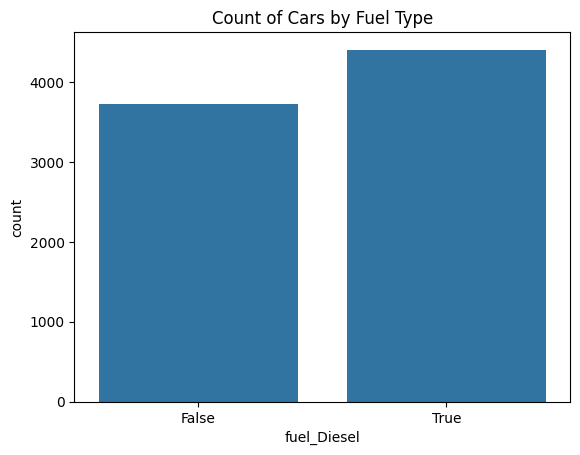

In [ ]:
sns.countplot(x='fuel_Diesel', data=df)  # Or fuel_Petrol, fuel_CNG, etc.
plt.title('Count of Cars by Fuel Type')
plt.show()


3. Boxplots
For detecting outliers in numerical features like Price, Mileage, Kilometers Driven.

Good for showing spread and extreme values.

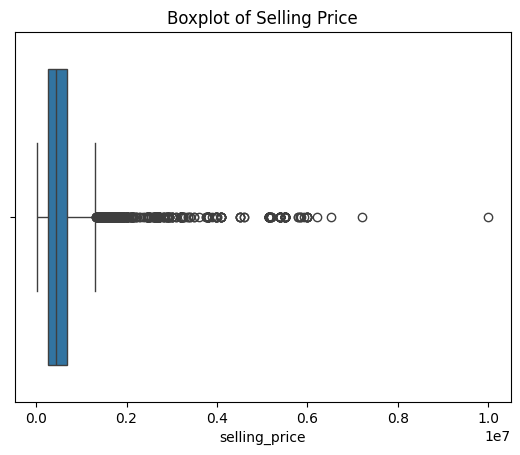

In [ ]:
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()



4. Correlation Heatmap
Shows relationships between features numerically.

Example: Selling Price vs Mileage, Engine size, etc.

Darker colors = stronger correlation.

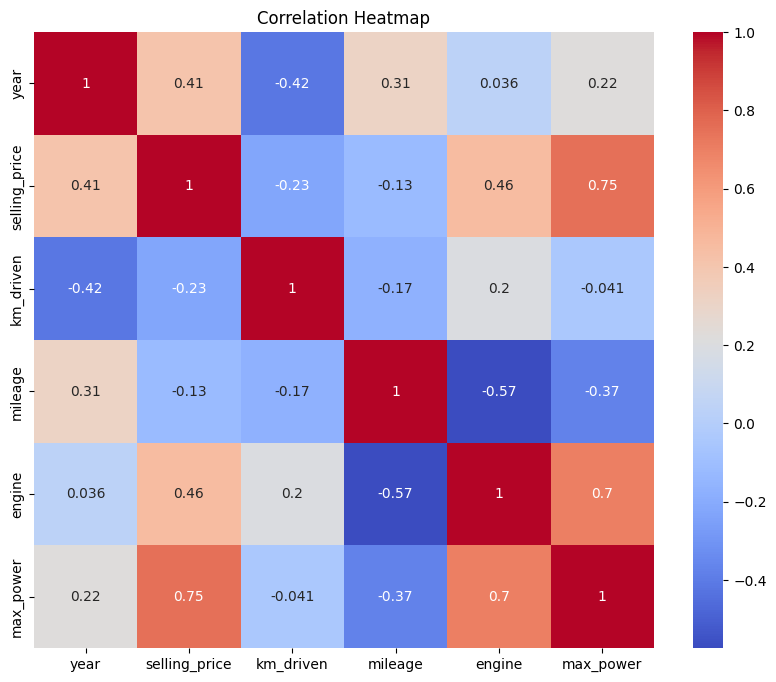

In [ ]:
# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns

# Calculate correlation on the numeric DataFrame
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


5. Scatter Plots
Selling Price vs Kilometers Driven

Selling Price vs Engine Size

Selling Price vs Max Power

(For example, lower kilometers → higher price)

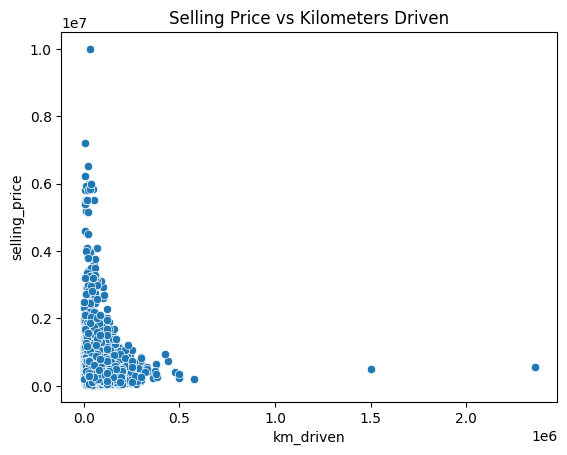

In [ ]:
#  Selling Price vs Kilometers Driven
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Selling Price vs Kilometers Driven')
plt.show()

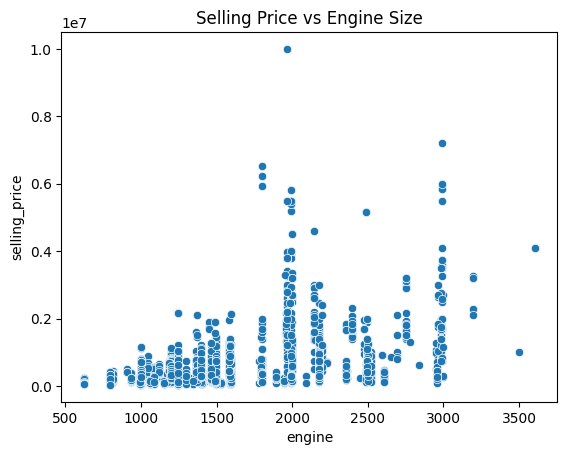

In [ ]:
# Selling Price vs Engine Size
sns.scatterplot(x='engine', y='selling_price', data=df)
plt.title('Selling Price vs Engine Size')
plt.show()

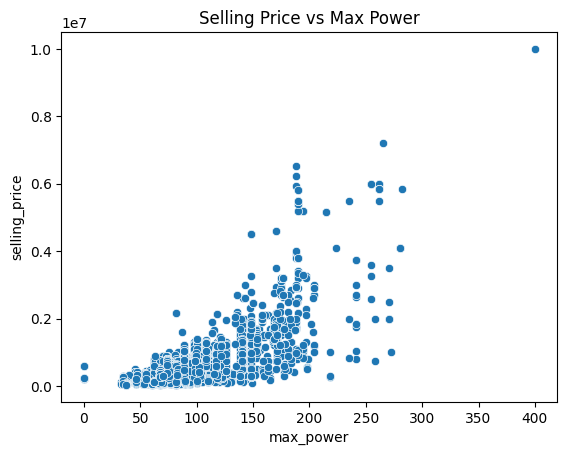

In [ ]:
# Selling Price vs Max Power
sns.scatterplot(x='max_power', y='selling_price', data=df)
plt.title('Selling Price vs Max Power')
plt.show()

In [ ]:
# df.to_csv('cleaned_data.csv', index=False)  # Replace df with your DataFrame name
# from google.colab import files
# files.download('cleaned_data.csv')  # Downloads it to your local machine

8. Splitting the Dataset into Training & Testing Sets.
 The standard split is 80% training and 20% testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['selling_price', 'name'])  # Dropping 'selling_price' (target) & 'name' (not useful)
y = df['selling_price']  # Target variable

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shape to verify
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (6502, 15) (6502,)
Testing set: (1626, 15) (1626,)


9. Feature Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (using the same scaler)
X_test_scaled = scaler.transform(X_test)

# Print shape to verify
print("Scaled Training Set Shape:", X_train_scaled.shape)
print("Scaled Testing Set Shape:", X_test_scaled.shape)


Scaled Training Set Shape: (6502, 15)
Scaled Testing Set Shape: (1626, 15)


✅ Quick Recap: What We’ve Done So Far
You have:

Cleaned and preprocessed the data.

Handled categorical variables (via one-hot encoding).

Dropped unnecessary columns (like torque and name).

Split the dataset into train and test sets (80-20 split).

Scaled the feature values to normalize them.

In [ ]:
# df.to_csv('cleaned_data.csv', index=False)  # Replace df with your DataFrame name
# from google.colab import files
# files.download('cleaned_data.csv')  # Downloads it to your local machine


10. Model Building — Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

Model Performance:
MAE: 267948.115754324
MSE: 198127475114.70956
RMSE: 445115.1256862763
R2 Score: 0.6977388586182252


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Step 2: Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Step 3: Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Model Performance:")
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"R2 Score: {r2_dt}")


Decision Tree Model Performance:
MAE: 81522.73497177279
MSE: 26551669462.965157
RMSE: 162946.8301715782
R2 Score: 0.959493059138714


Decision Tree

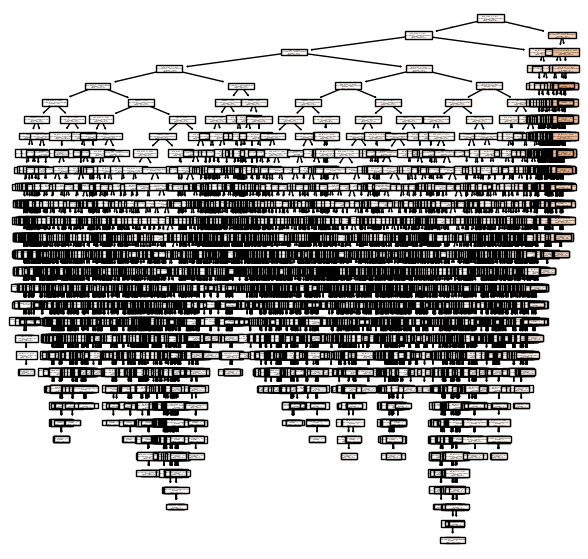

In [ ]:
from sklearn import tree
plt.subplots(figsize= (7, 7))
tree.plot_tree(dt_model, feature_names=X_train.columns, filled=True)
plt.show()

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Fit the model
rf_model.fit(X_train_scaled, y_train)

# Step 3: Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 4: Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 5: Print performance
print("Random Forest Regressor Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")


Random Forest Regressor Performance:
MAE: 70433.68089277198
MSE: 21434096031.579002
RMSE: 146403.87983786155
R2 Score: 0.9673003740281823


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

# Print the results
print("Gradient Boosting Regressor Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


Gradient Boosting Regressor Performance:
MAE: 92647.40821630982
MSE: 25621516056.064037
RMSE: 160067.223553306
R2 Score: 0.9609120911546789


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Regressor Performance:")
print(f"MAE: {xgb_mae}")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"R2 Score: {xgb_r2}")


XGBoost Regressor Performance:
MAE: 72003.8984375
MSE: 26667431936.0
RMSE: 163301.65931796285
R2 Score: 0.9593164324760437


K - Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate performance
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor Performance:")
print(f"MAE: {mae_knn}")
print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R2 Score: {r2_knn}")


KNN Regressor Performance:
MAE: 95865.64292742926
MSE: 33417586217.896507
RMSE: 182804.77624475927
R2 Score: 0.9490184905117415


accuracy, precision and confusion matrix

R2 score bar graph

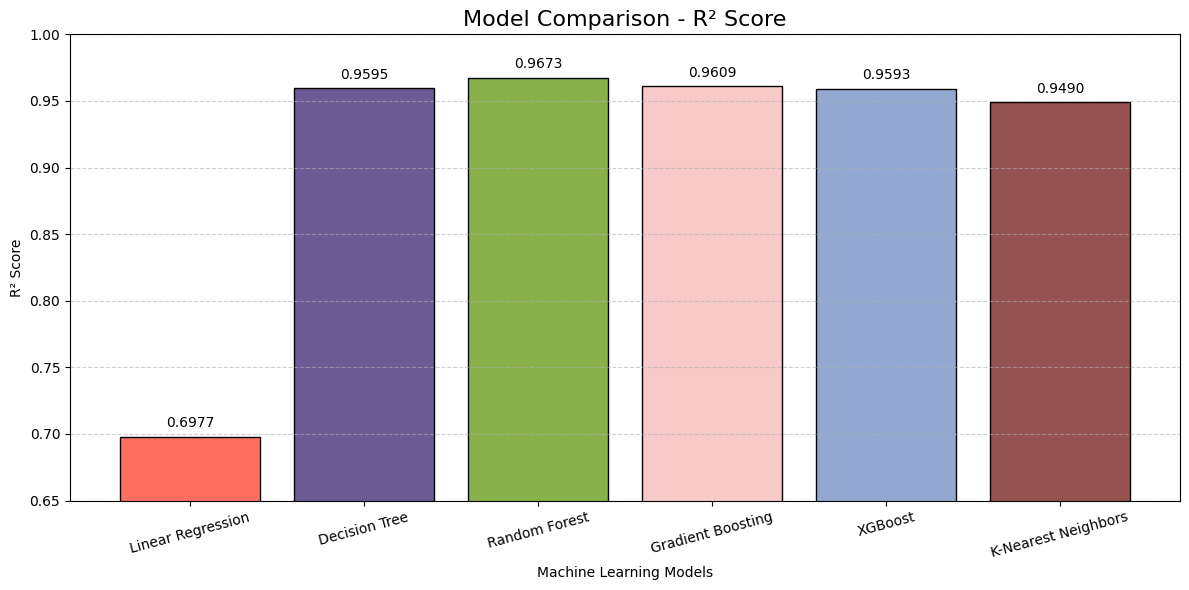

In [ ]:
import matplotlib.pyplot as plt

# Model names and R² scores
models = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'XGBoost',
    'K-Nearest Neighbors'
]

r2_scores = [
    0.6977,   # Linear Regression
    0.9595,   # Decision Tree
    0.9673,   # Random Forest
    0.9609,   # Gradient Boosting
    0.9593,   # XGBoost
    0.9490    # KNN
]

# Define custom colors for each bar
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251']

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(models, r2_scores, color=colors, edgecolor='black')
plt.ylim(0.65, 1.0)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('Model Comparison - R² Score', fontsize=16)
plt.xlabel('Machine Learning Models')
plt.ylabel('R² Score')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Model Selection and Making a prediction System

In [ ]:
# import numpy as np

# # Get user inputs
# print("🔧 Please enter the following car details:")

# year = int(input("Year of Manufacture (e.g. 2017): "))
# km_driven = int(input("Kilometers Driven (e.g. 45000): "))
# mileage = float(input("Mileage (e.g. 20.5): "))
# engine = float(input("Engine (in CC, e.g. 1200): "))
# max_power = float(input("Max Power (in bhp, e.g. 85): "))

# # Fuel type options
# fuel_type = input("Fuel Type (Diesel / Petrol / LPG): ").strip().lower()
# fuel_Diesel = 1 if fuel_type == 'diesel' else 0
# fuel_Petrol = 1 if fuel_type == 'petrol' else 0
# fuel_LPG = 1 if fuel_type == 'lpg' else 0

# # Seller type
# seller_type = input("Seller Type (Dealer / Individual / Trustmark Dealer): ").strip().lower()
# seller_type_Individual = 1 if seller_type == 'individual' else 0
# seller_type_Trustmark = 1 if seller_type == 'trustmark dealer' else 0

# # Transmission
# transmission = input("Transmission (Manual / Automatic): ").strip().lower()
# transmission_Manual = 1 if transmission == 'manual' else 0

# # Owner type
# owner_type = input("Owner (First / Second / Third / Fourth & Above / Test Drive Car): ").strip().lower()
# owner_Second = 1 if owner_type == 'second' else 0
# owner_Third = 1 if owner_type == 'third' else 0
# owner_Fourth = 1 if owner_type == 'fourth & above' else 0
# owner_Test_Drive = 1 if owner_type == 'test drive car' else 0

# # Create input in the correct format
# input_data = np.array([[year, km_driven, mileage, engine, max_power,
#                         fuel_Diesel, fuel_LPG, fuel_Petrol,
#                         seller_type_Individual, seller_type_Trustmark,
#                         transmission_Manual,
#                         owner_Fourth, owner_Second, owner_Test_Drive, owner_Third]])

# # Apply feature scaling
# input_scaled = scaler.transform(input_data)

# # Predict
# predicted_price = rf_model.predict(input_scaled)

# print(f"\n💰 Predicted Selling Price: ₹ {predicted_price[0]:,.2f}")


Building UI using Streamlit

In [ ]:
# !pip install streamlit


Importing pickle


In [ ]:
import pickle

# Assuming rf_model is the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file) # Changed random_forest_model to rf_model

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)